In [1]:
import lime
print("✅ LIME is installed and ready.")


✅ LIME is installed and ready.


In [2]:
# Step 1: Import Required Libraries ✅ Standard imports
import numpy as np
import pandas as pd
import joblib

# ✅ Visualization
import matplotlib.pyplot as plt

# ✅ Model explanation
from lime.lime_tabular import LimeTabularExplainer

# ✅ Disable warnings if needed
import warnings
warnings.filterwarnings("ignore")


In [7]:
# Step 2: Load Model, Scaler, and Test Data
import joblib
import pandas as pd

# Load RF model and scaler
model = joblib.load(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\random_forest_weighted_model.pkl")
scaler = joblib.load(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\global_scaler_rf_weighted.pkl")

# Load test data
X_test = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\X_test.csv")
y_test = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\y_test.csv")

print("✅ Model, Scaler, and Test Data loaded successfully.")


✅ Model, Scaler, and Test Data loaded successfully.


In [8]:
#  Step 3: Prepare LIME Explainer
from lime.lime_tabular import LimeTabularExplainer

# Inverse transform the scaled test data for LIME visualization
X_test_inv = scaler.inverse_transform(X_test)

# Initialize the explainer
explainer = LimeTabularExplainer(
    training_data=X_test_inv,
    feature_names=X_test.columns,
    class_names=[str(i) for i in range(len(set(y_test)))],
    mode='classification',
    verbose=True
)

print("✅ LIME Explainer is ready.")


✅ LIME Explainer is ready.



🔍 Explaining instance 100
Intercept 0.019057767064960082
Prediction_local [0.03447359]
Right: 0.0


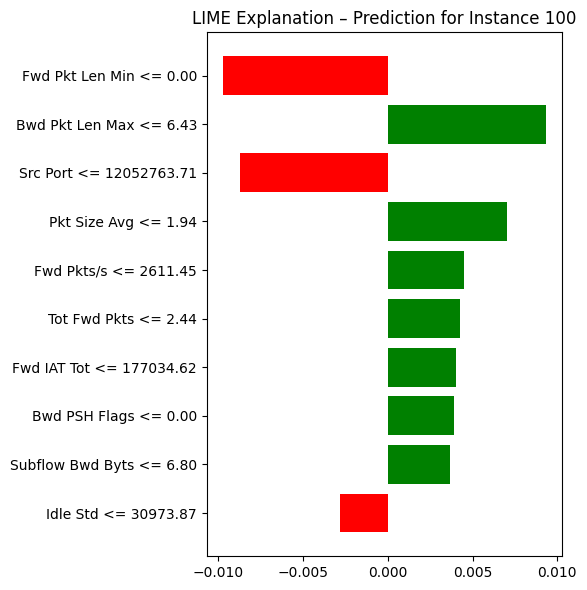


🔍 Explaining instance 500
Intercept 0.023765120408805723
Prediction_local [0.01521537]
Right: 0.0


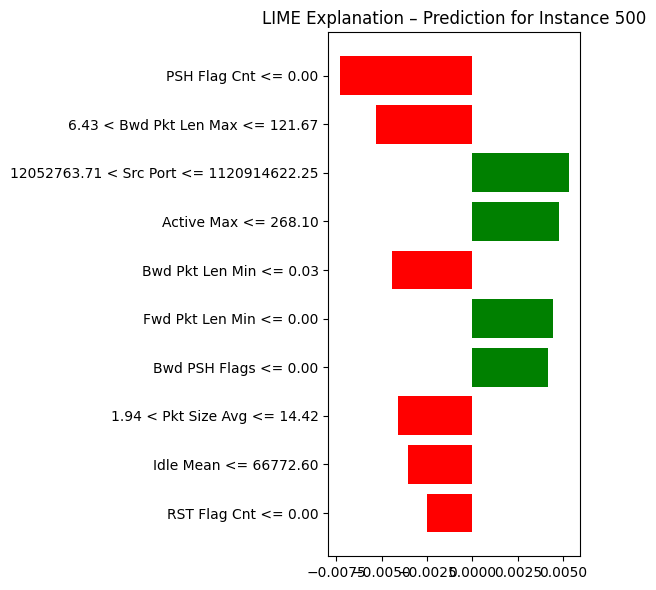


🔍 Explaining instance 800
Intercept -0.0031875416419085527
Prediction_local [0.03228723]
Right: 0.0


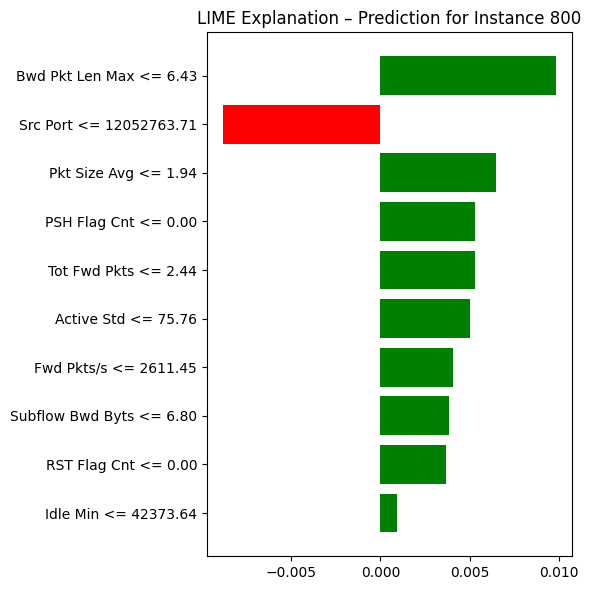

In [13]:
# ✅ Step 4: Generate: LIME Explanation for Random Forest (Instances 100, 500, 800)

import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# Step 1: Prepare inverse test data
X_test_inv = scaler.inverse_transform(X_test)

# Step 2: Initialize explainer
explainer = LimeTabularExplainer(
    training_data=X_test_inv,
    feature_names=X_test.columns.tolist(),
    mode="classification",
    verbose=True,
    random_state=42
)

# Step 3: Indices to explain (change if needed)
sample_indices = [100, 500, 800]

# Step 4: Loop through and explain each
for idx in sample_indices:
    print(f"\n🔍 Explaining instance {idx}")
    
    exp = explainer.explain_instance(
        data_row=X_test_inv[idx],
        predict_fn=model.predict_proba,
        num_features=10
    )
    
    # Plot without specifying label
    fig = exp.as_pyplot_figure()
    fig.set_size_inches(6, 6)
    plt.title(f"LIME Explanation – Prediction for Instance {idx}")
    plt.tight_layout()
    plt.show()
